In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"armutri","key":"129d3395464a8b400d13aaa17f027bd7"}'}

In [4]:
import os
# Move the kaggle.json file to the appropriate directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the kaggle.json file
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [5]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs


Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
100% 490M/492M [00:07<00:00, 97.3MB/s]
100% 492M/492M [00:07<00:00, 72.3MB/s]


In [6]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Stocks/ergf.us.txt  
  inflating: /content/dataset/Stocks/erh.us.txt  
  inflating: /content/dataset/Stocks/eri.us.txt  
  inflating: /content/dataset/Stocks/eric.us.txt  
  inflating: /content/dataset/Stocks/erie.us.txt  
  inflating: /content/dataset/Stocks/erii.us.txt  
  inflating: /content/dataset/Stocks/erj.us.txt  
  inflating: /content/dataset/Stocks/erm.us.txt  
  inflating: /content/dataset/Stocks/ern.us.txt  
  inflating: /content/dataset/Stocks/eros.us.txt  
  inflating: /content/dataset/Stocks/eryp.us.txt  
  inflating: /content/dataset/Stocks/es.us.txt  
  inflating: /content/dataset/Stocks/esba.us.txt  
  inflating: /content/dataset/Stocks/esbk.us.txt  
  inflating: /content/dataset/Stocks/esca.us.txt  
  inflating: /content/dataset/Stocks/esdi.us.txt  
  inflating: /content/dataset/Stocks/esdiw.us.txt  
  inflating: /content/dataset/Stocks/ese.us.txt  
  inflating: /content/dataset/Stocks/e

In [7]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset/')


['Data', 'Stocks', 'ETFs']

In [31]:
# Open and read the first few lines of the .txt file to inspect the content
with open('/content/dataset/Stocks/z.us.txt', 'r') as file:
    lines = file.readlines()

# Display the first few lines
print(lines[:10])  # Adjust the number of lines displayed as needed


['Date,Open,High,Low,Close,Volume,OpenInt\n', '2015-08-03,27.65,28.82,25.72,27.74,144677,0\n', '2015-08-04,27,27.03,24.61,25.8,129600,0\n', '2015-08-05,27.11,27.47,24.56,25.24,107600,0\n', '2015-08-06,24.81,26.95,22.99,26.95,73134,0\n', '2015-08-07,27.5,27.5,24.2,26.5,52200,0\n', '2015-08-10,25.76,26.5,25.46,26.14,51400,0\n', '2015-08-11,25.44,26.02,24.56,25.38,140951,0\n', '2015-08-12,25,26.21,25,25.99,172600,0\n', '2015-08-13,26,26.6,25.76,26.2,229500,0\n']


In [38]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv('/content/dataset/Stocks/z.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2015-08-03,27.65,28.82,25.72,27.74,144677,0
1,2015-08-04,27.00,27.03,24.61,25.80,129600,0
2,2015-08-05,27.11,27.47,24.56,25.24,107600,0
3,2015-08-06,24.81,26.95,22.99,26.95,73134,0
4,2015-08-07,27.50,27.50,24.20,26.50,52200,0


In [39]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close  Volume  OpenInt
0  2015-08-03  27.65  28.82  25.72  27.74  144677        0
1  2015-08-04  27.00  27.03  24.61  25.80  129600        0
2  2015-08-05  27.11  27.47  24.56  25.24  107600        0
3  2015-08-06  24.81  26.95  22.99  26.95   73134        0
4  2015-08-07  27.50  27.50  24.20  26.50   52200        0
(576, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


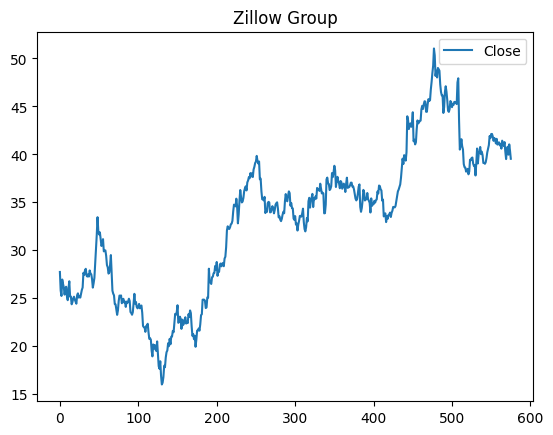

In [40]:
df[['Close']].plot()
plt.title("Zillow Group")
plt.show()

Text(0.5, 1.0, 'Zillow Group Cumulative Returns')

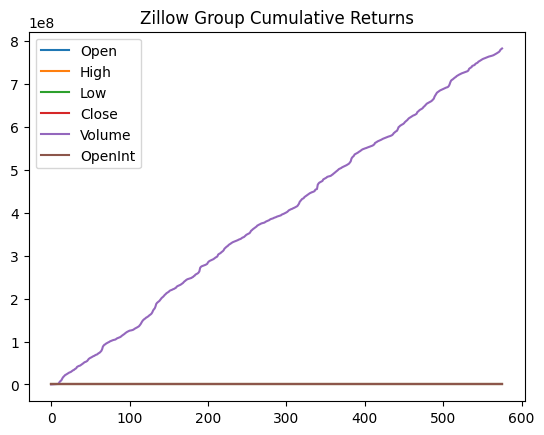

In [41]:
dr = df.cumsum()
dr.plot()
plt.title('Zillow Group Cumulative Returns')

Text(0.5, 1.0, 'Zillow Group Autocorrelation plot')

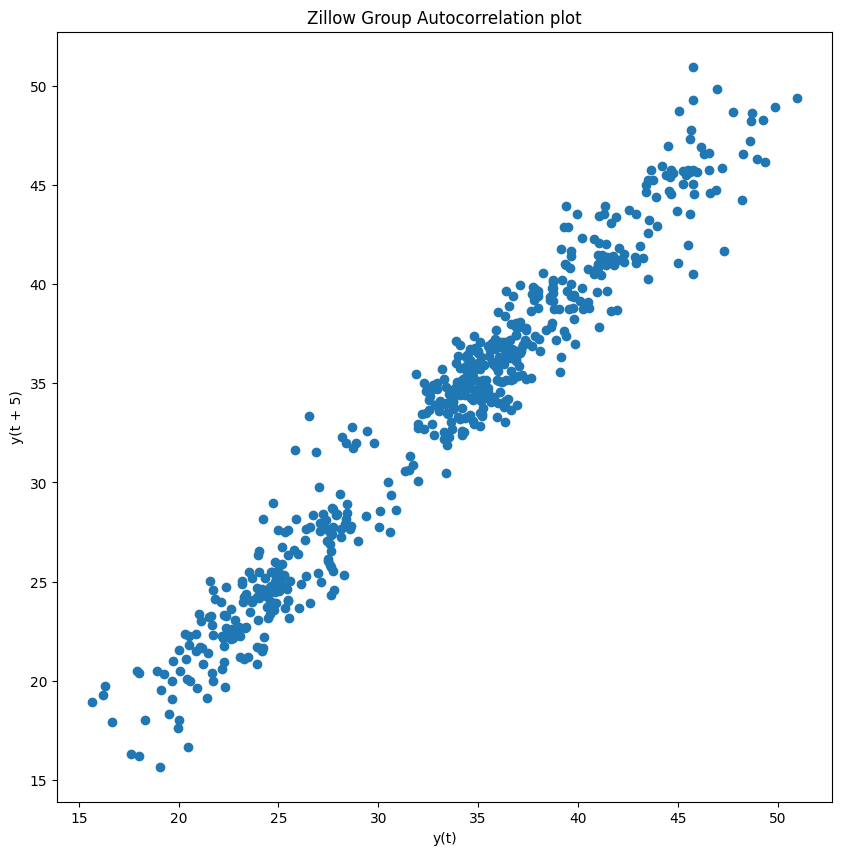

In [42]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Zillow Group Autocorrelation plot')

In [43]:
df['Date'][100]

'2015-12-23'

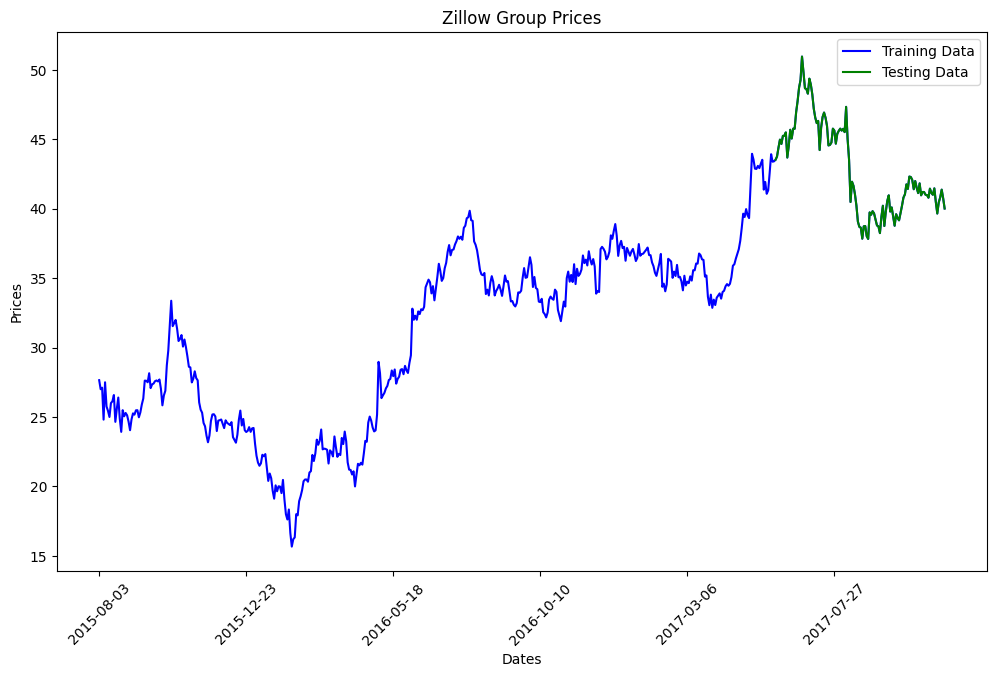

In [49]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Zillow Group Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,575,100), df['Date'][0:575:100], rotation=45)
plt.legend()

In [46]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [47]:
!pip install pmdarima

In [50]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.715
Symmetric mean absolute percentage error: 1.536


<ipython-input-51-3383adae1cb5>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


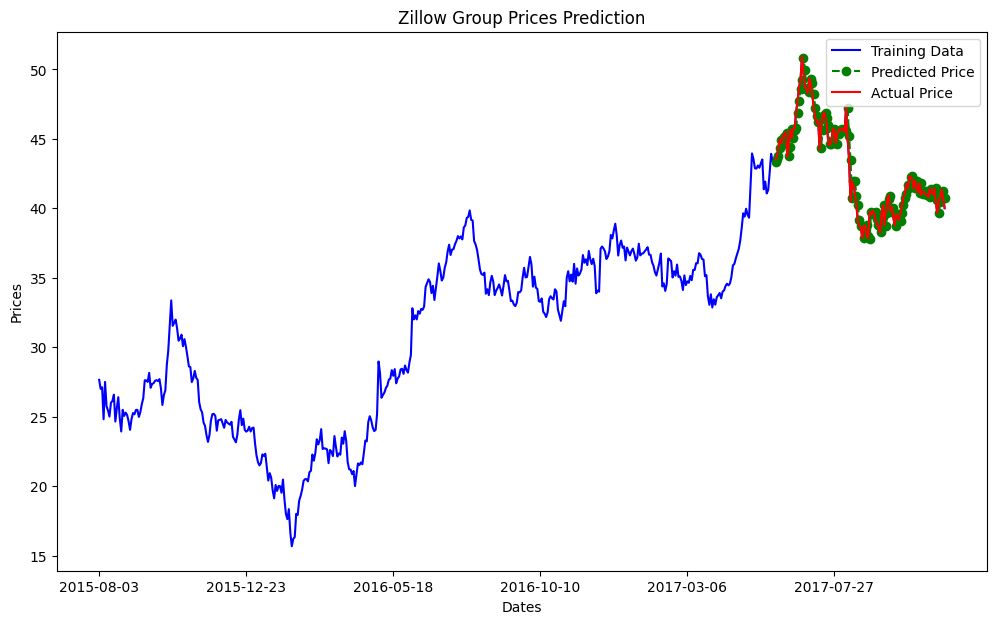

In [51]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Zillow Group Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,575, 100), df['Date'][0:575:100])
plt.legend()

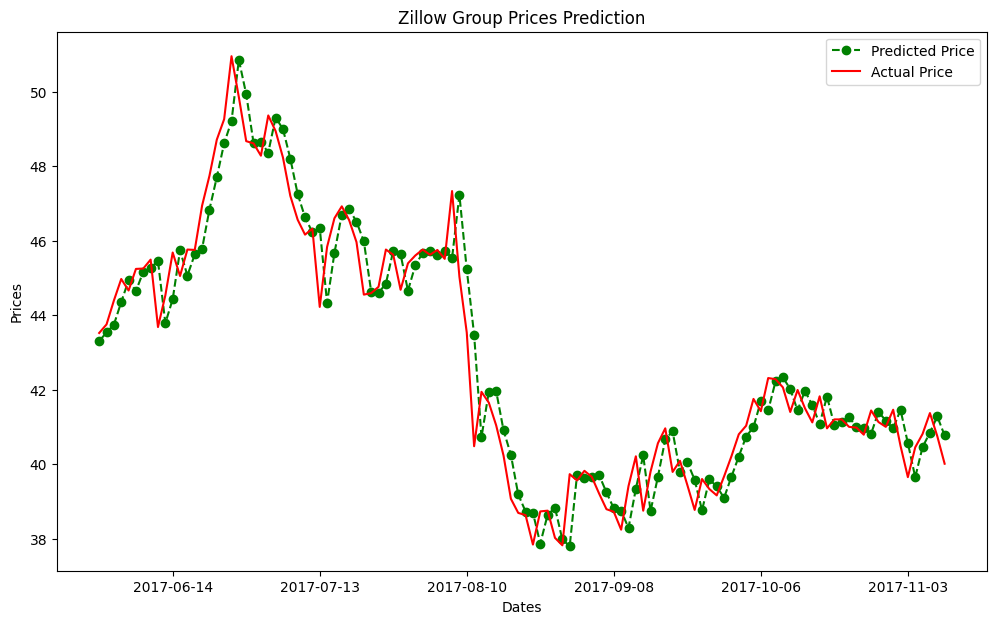

In [59]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(470,575, 20), df['Date'][470:575:20])
plt.title('Zillow Group Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()